In [8]:
#importing the libraries
%matplotlib inline
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from multiprocessing import Pool
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
from akapriori import apriori
import armine
import networkx as nx
import hashlib

#loading the datasets
orders_all = pd.read_csv("orders.csv",index_col=None,header=0)
orders_prod_p=pd.read_csv("order_products__prior.csv",index_col=None,header=0)
orders_prod_t=pd.read_csv("order_products__train.csv",index_col=None,header=0)
products=pd.read_csv("products.csv",index_col=None,header=0)
dept=pd.read_csv("departments.csv",index_col=None,header=0)
aisles=pd.read_csv("aisles.csv",index_col=None,header=0)

#merging datasets to create single transaction file
orders_prod_norm=orders_prod_t.merge(orders_all,on="order_id")
orders_prod_norm=orders_prod_norm.merge(products,on="product_id")
orders_prod_norm=orders_prod_norm.merge(aisles,on="aisle_id")
orders_prod_norm=orders_prod_norm.merge(dept,on="department_id")

orders_prod_norm["product_id_str"]=orders_prod_norm["product_id"].astype(str)

#building apriori
g=orders_prod_norm.groupby("order_id")["product_name"]
g1=g.apply(lambda x: ','.join(x.str.replace(","," ")))
g2=pd.DataFrame(g1)
g2.reset_index(inplace=True)
g2["prod_list"]=g2.apply(lambda x: tuple(x["product_name"].split(",")),axis=1)

#creating a list of lists
rules = apriori(list(g2["prod_list"]), support=0.001, confidence=0.25, lift=1.0)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]), reverse=True) # ORDER BY lift DESC, confidence DESC, support DESC

rules_list=[]
for r in rules_sorted:
    rules_list.append([list(r[0])[0],list(r[1])[0],r[2],r[3],r[4]])

df_rules=pd.DataFrame(rules_list)
df_rules.columns=["From","To","Support","Confidence","Lift"]

df_rules.head()
df_rules.to_csv('C:/Users/sayan/Desktop/insta_result/rules_by_products',index=False)
print('done')

done


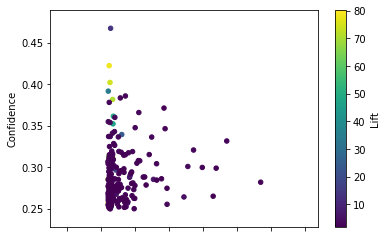

In [4]:
ax2 = df_rules.plot.scatter(x='Support',
                      y='Confidence',
                      c='Lift',
                      colormap='viridis')

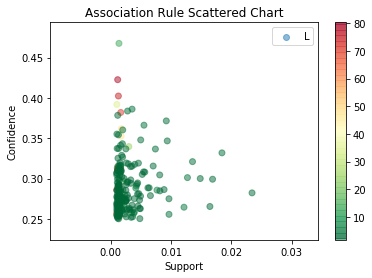

In [126]:
#Association rule scatterplot
x = np.array(df_rules['Support'])
y = np.array(df_rules['Confidence'])
colors = np.array(df_rules['Lift'])

plt.scatter(x, y, c=colors, cmap='RdYlGn_r',alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend('Lift')
plt.title('Association Rule Scattered Chart')
plt.colorbar()
plt.show()

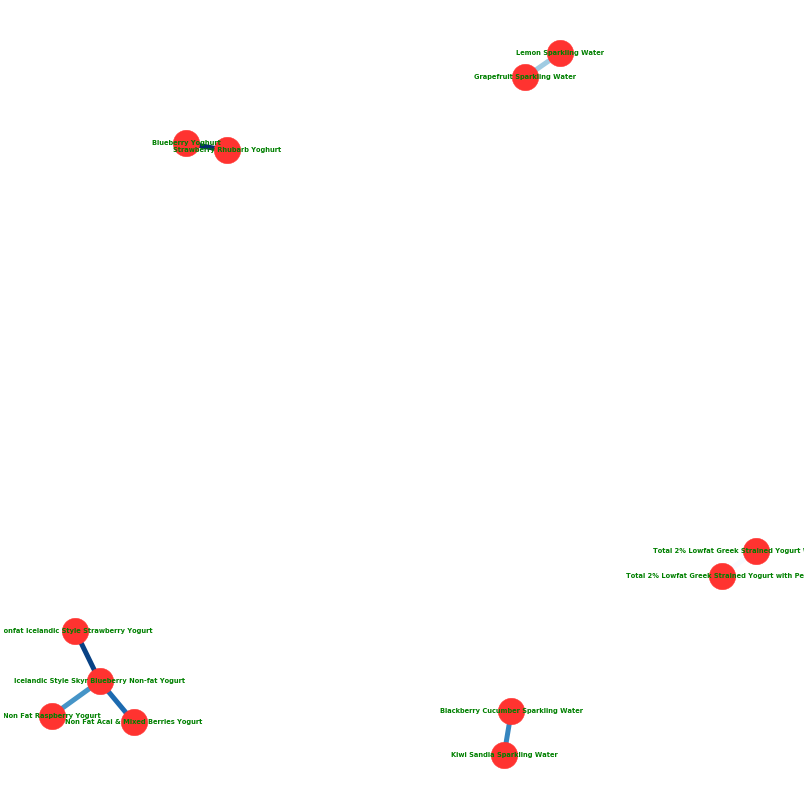

In [48]:
#Association Rules Graph
G=nx.from_pandas_edgelist(df_rules.head(10),"From","To","Lift")
my_dpi=40
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi,facecolor="lightslategray")

plt.facecolor="Black"
edges = G.edges()
colors = [G[u][v]['Lift'] for u,v in edges]
nx.draw(G,with_labels=True,node_color="#ff3330",node_size=2250,edge_color=colors, arrows=False,font_color="Green",font_weight="bold",font_size=12,style="solid",width=9,edge_cmap=plt.cm.Blues)

plt.savefig("nx.png",format="png" )
plt.show()

In [112]:
clear


In [111]:
clear

In [123]:
# Top 10 Marketing Insights of Association by Product on Lift

#df_mrk_ins=pd.DataFrame("People who usually buy "+"{"+df_rules.head(10)['From']+"}"+" also buy"+"{"+df_rules.head(10)['To']+"}")
df_rules_by_lift=pd.DataFrame("People who usually buy "+ '<b>' + "{" + df_rules.head(10)['From'].astype(str) + "}" +'</b>'+" also buy "+'<b>' + "{" + df_rules.head(10)['To'].astype(str) + "}" +'</b>')
pd.set_option("expand_frame_repr", True)
df_rules_by_lift.columns=["Marketing Insights"]

left_aligned_df_lift = df_rules_by_lift.style.set_properties(**{'text-align': 'left'})
left_aligned_df_lift = left_aligned_df_lift.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])
display(left_aligned_df)


,Marketting Insight
0,People who usually buy {Strawberry Rhubarb Yoghurt} also buy {Blueberry Yoghurt}
1,People who usually buy {Blueberry Yoghurt} also buy {Strawberry Rhubarb Yoghurt}
2,People who usually buy {Nonfat Icelandic Style Strawberry Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
3,People who usually buy {Non Fat Acai & Mixed Berries Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
4,People who usually buy {Blackberry Cucumber Sparkling Water} also buy {Kiwi Sandia Sparkling Water}
5,People who usually buy {Kiwi Sandia Sparkling Water} also buy {Blackberry Cucumber Sparkling Water}
6,People who usually buy {Non Fat Raspberry Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
7,People who usually buy {Icelandic Style Skyr Blueberry Non-fat Yogurt} also buy {Non Fat Raspberry Yogurt}
8,People who usually buy {Lemon Sparkling Water} also buy {Grapefruit Sparkling Water}
9,People who usually buy {Total 2% Lowfat Greek Strained Yogurt With Blueberry} also buy {Total 2% Lowfat Greek Strained Yogurt with Peach}


In [107]:
# Top 10 Marketting Insight of products by Confidence
df_rules_by_confidence=df_rules.sort_values(by=['Confidence'], ascending=False)
df_rules_by_confidence=pd.DataFrame("People who usually buy "+ '<b>' + "{" + df_rules_by_confidence.head(10)['From'].astype(str) + "}" +'</b>'+" also buy "+'<b>' + "{" + df_rules_by_confidence.head(10)['To'].astype(str) + "}" +'</b>')

pd.set_option("expand_frame_repr", True)
df_rules_by_confidence.columns=["Marketting Insight"]

left_aligned_df_confidence = df_rules_by_confidence.style.set_properties(**{'text-align': 'left'})
left_aligned_df_confidence = left_aligned_df_confidence.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])
display(left_aligned_df_confidence)



,Marketting Insight
24,People who usually buy {Organic Yellow Squash} also buy {Organic Zucchini}
2,People who usually buy {Nonfat Icelandic Style Strawberry Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
3,People who usually buy {Non Fat Acai & Mixed Berries Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
20,People who usually buy {Zero Calorie Cola} also buy {Soda}
70,People who usually buy {Bartlett Pears} also buy {Banana}
74,People who usually buy {Gala Apples} also buy {Banana}
6,People who usually buy {Non Fat Raspberry Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
77,People who usually buy {Sweet Potato Yam} also buy {Banana}
83,People who usually buy {Organic Fuji Apple} also buy {Banana}
53,People who usually buy {Organic Navel Orange} also buy {Bag of Organic Bananas}


In [110]:
# Top 10 Marketting Insight of products by Support
df_rules_by_support=df_rules.sort_values(by=['Support'], ascending=False)
df_rules_by_support=pd.DataFrame("People who usually buy "+ '<b>' + "{" + df_rules_by_support.head(10)['From'].astype(str) + "}" +'</b>'+" also buy "+'<b>' + "{" + df_rules_by_support.head(10)['To'].astype(str) + "}" +'</b>')

pd.set_option("expand_frame_repr", True)
df_rules_by_support.columns=["Marketting Insight"]

left_aligned_df_support = df_rules_by_support.style.set_properties(**{'text-align': 'left'})
left_aligned_df_support = left_aligned_df_support.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])
display(left_aligned_df_support)

,Marketting Insight
98,People who usually buy {Organic Strawberries} also buy {Bag of Organic Bananas}
66,People who usually buy {Organic Hass Avocado} also buy {Bag of Organic Bananas}
146,People who usually buy {Organic Avocado} also buy {Banana}
191,People who usually buy {Large Lemon} also buy {Banana}
145,People who usually buy {Strawberries} also buy {Banana}
68,People who usually buy {Organic Raspberries} also buy {Bag of Organic Bananas}
42,People who usually buy {Organic Raspberries} also buy {Organic Strawberries}
39,People who usually buy {Limes} also buy {Large Lemon}
54,People who usually buy {Organic Blueberries} also buy {Organic Strawberries}
107,People who usually buy {Organic Cucumber} also buy {Bag of Organic Bananas}


In [115]:
orders_prod_norm.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,product_id_str
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs,49302
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs,49302
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs,49302
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs,49302
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs,49302


In [117]:
orders_prod_norm.shape

(1384617, 16)

In [118]:
rules_sorted

[(frozenset({'Strawberry Rhubarb Yoghurt'}),
  frozenset({'Blueberry Yoghurt'}),
  0.001196564260073623,
  0.3096646942800789,
  80.29801358062228),
 (frozenset({'Blueberry Yoghurt'}),
  frozenset({'Strawberry Rhubarb Yoghurt'}),
  0.001196564260073623,
  0.3102766798418972,
  80.29801358062227),
 (frozenset({'Nonfat Icelandic Style Strawberry Yogurt'}),
  frozenset({'Icelandic Style Skyr Blueberry Non-fat Yogurt'}),
  0.001166078546441174,
  0.42265193370165743,
  78.66062066533442),
 (frozenset({'Non Fat Acai & Mixed Berries Yogurt'}),
  frozenset({'Icelandic Style Skyr Blueberry Non-fat Yogurt'}),
  0.00128802140097097,
  0.4023809523809524,
  74.88794663964876),
 (frozenset({'Blackberry Cucumber Sparkling Water'}),
  frozenset({'Kiwi Sandia Sparkling Water'}),
  0.001013649978278929,
  0.25675675675675674,
  72.44902644580064),
 (frozenset({'Kiwi Sandia Sparkling Water'}),
  frozenset({'Blackberry Cucumber Sparkling Water'}),
  0.001013649978278929,
  0.2860215053763441,
  72.44902

In [119]:
rules_list

[['Strawberry Rhubarb Yoghurt',
  'Blueberry Yoghurt',
  0.001196564260073623,
  0.3096646942800789,
  80.29801358062228],
 ['Blueberry Yoghurt',
  'Strawberry Rhubarb Yoghurt',
  0.001196564260073623,
  0.3102766798418972,
  80.29801358062227],
 ['Nonfat Icelandic Style Strawberry Yogurt',
  'Icelandic Style Skyr Blueberry Non-fat Yogurt',
  0.001166078546441174,
  0.42265193370165743,
  78.66062066533442],
 ['Non Fat Acai & Mixed Berries Yogurt',
  'Icelandic Style Skyr Blueberry Non-fat Yogurt',
  0.00128802140097097,
  0.4023809523809524,
  74.88794663964876],
 ['Blackberry Cucumber Sparkling Water',
  'Kiwi Sandia Sparkling Water',
  0.001013649978278929,
  0.25675675675675674,
  72.44902644580064],
 ['Kiwi Sandia Sparkling Water',
  'Blackberry Cucumber Sparkling Water',
  0.001013649978278929,
  0.2860215053763441,
  72.44902644580063],
 ['Non Fat Raspberry Yogurt',
  'Icelandic Style Skyr Blueberry Non-fat Yogurt',
  0.0016767142497846946,
  0.3819444444444444,
  71.08446611505

In [121]:
df_rules.head()

,From,To,Support,Confidence,Lift
0,Strawberry Rhubarb Yoghurt,Blueberry Yoghurt,0.001197,0.309665,80.298014
1,Blueberry Yoghurt,Strawberry Rhubarb Yoghurt,0.001197,0.310277,80.298014
2,Nonfat Icelandic Style Strawberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.001166,0.422652,78.660621
3,Non Fat Acai & Mixed Berries Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.001288,0.402381,74.887947
4,Blackberry Cucumber Sparkling Water,Kiwi Sandia Sparkling Water,0.001014,0.256757,72.449026


In [125]:
# Top 10 Marketing Insights of Association by Products on Lift

df_rules_by_lift=pd.DataFrame("People who usually buy "+ '<b>' + "{" + df_rules.head(10)['From'].astype(str) + "}" +'</b>'+" also buy "+'<b>' + "{" + df_rules.head(10)['To'].astype(str) + "}" +'</b>')
pd.set_option("expand_frame_repr", True)
df_rules_by_lift.columns=["Marketing Insights"]

left_aligned_df_lift = df_rules_by_lift.style.set_properties(**{'text-align': 'left'})
left_aligned_df_lift = left_aligned_df_lift.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])
display(left_aligned_df_lift)


,Marketing Insights
0,People who usually buy {Strawberry Rhubarb Yoghurt} also buy {Blueberry Yoghurt}
1,People who usually buy {Blueberry Yoghurt} also buy {Strawberry Rhubarb Yoghurt}
2,People who usually buy {Nonfat Icelandic Style Strawberry Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
3,People who usually buy {Non Fat Acai & Mixed Berries Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
4,People who usually buy {Blackberry Cucumber Sparkling Water} also buy {Kiwi Sandia Sparkling Water}
5,People who usually buy {Kiwi Sandia Sparkling Water} also buy {Blackberry Cucumber Sparkling Water}
6,People who usually buy {Non Fat Raspberry Yogurt} also buy {Icelandic Style Skyr Blueberry Non-fat Yogurt}
7,People who usually buy {Icelandic Style Skyr Blueberry Non-fat Yogurt} also buy {Non Fat Raspberry Yogurt}
8,People who usually buy {Lemon Sparkling Water} also buy {Grapefruit Sparkling Water}
9,People who usually buy {Total 2% Lowfat Greek Strained Yogurt With Blueberry} also buy {Total 2% Lowfat Greek Strained Yogurt with Peach}


In [127]:
df_rules.head(10)

,From,To,Support,Confidence,Lift
0,Strawberry Rhubarb Yoghurt,Blueberry Yoghurt,0.001197,0.309665,80.298014
1,Blueberry Yoghurt,Strawberry Rhubarb Yoghurt,0.001197,0.310277,80.298014
2,Nonfat Icelandic Style Strawberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.001166,0.422652,78.660621
3,Non Fat Acai & Mixed Berries Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.001288,0.402381,74.887947
4,Blackberry Cucumber Sparkling Water,Kiwi Sandia Sparkling Water,0.001014,0.256757,72.449026
5,Kiwi Sandia Sparkling Water,Blackberry Cucumber Sparkling Water,0.001014,0.286022,72.449026
6,Non Fat Raspberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.001677,0.381944,71.084466
7,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Raspberry Yogurt,0.001677,0.312057,71.084466
8,Lemon Sparkling Water,Grapefruit Sparkling Water,0.001097,0.313043,65.197019
9,Total 2% Lowfat Greek Strained Yogurt With Blueberry,Total 2% Lowfat Greek Strained Yogurt with Peach,0.001364,0.276662,56.367206
